In [1]:
import pandas as pd

In [2]:
df_train=pd.read_csv("application_train.csv")
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_test=pd.read_csv("application_test.csv")
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
nb_levels_sr = df_train.nunique()
binary_features_lst = nb_levels_sr.loc[nb_levels_sr == 2].index.tolist()
categorical_features_lst = list(set(df_train.select_dtypes(["object"]).columns.tolist()) - set(binary_features_lst))
numerical_features_lst = list(set(df_train.columns.tolist()) - set(categorical_features_lst) - set(binary_features_lst))
binary_features_lst = list(set(binary_features_lst) - {"TARGET"})

print("Binary features:", binary_features_lst)
print("\n")
print("Categorical features:", categorical_features_lst)
print("\n")
print("Numerical features:", numerical_features_lst)

Binary features: ['FLAG_DOCUMENT_11', 'FLAG_EMAIL', 'FLAG_MOBIL', 'FLAG_PHONE', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_4', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_15', 'FLAG_WORK_PHONE', 'NAME_CONTRACT_TYPE', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_7', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_10', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_8', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_13', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_19', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_2', 'EMERGENCYSTATE_MODE']


Categorical features: ['NAME_EDUCATION_TYPE', 'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'CODE_GENDER', 'FONDKAPREMONT_MODE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'NAME_H

Percentage of repaid: 8.0729 %
Percentage of not repaid: 91.9271 %


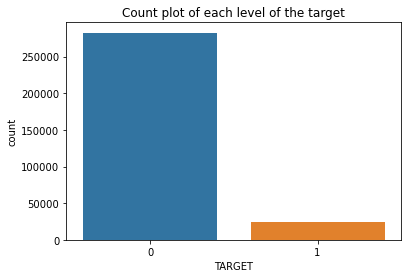

In [5]:
import matplotlib.pylab as plt
import seaborn as sns

sns.countplot(x = df_train["TARGET"])
plt.title("Count plot of each level of the target")
print("Percentage of repaid:", round((df_train["TARGET"].loc[df_train["TARGET"] == 1].shape[0] / df_train["TARGET"].shape[0]) * 100, 4), "%")
print("Percentage of not repaid:", round((df_train["TARGET"].loc[df_train["TARGET"] == 0].shape[0] / df_train["TARGET"].shape[0]) * 100, 4), "%")

([<matplotlib.patches.Wedge at 0x15482af0790>,
 [Text(-1.0648123216659293, 0.27599768047650985, '0'),
  Text(1.0648123152057372, -0.27599770540024077, '1')],
 [Text(-0.5808067209086887, 0.15054418935082356, '91.9%\n(282686)'),
  Text(0.5808067173849475, -0.15054420294558588, '8.1%\n(24825)')])

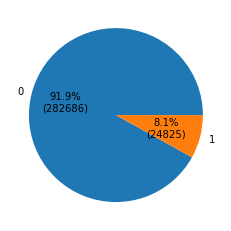

In [6]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = df_train['TARGET'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
#pandas only alternative
#s.plot.pie(autopct=autopct_format(s))

In [124]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    fig, ax = plt.subplots(1, 2, sharex = False, sharey = False, figsize = (20, 10))
    # Plot levels distribution
    if df_train[feature].nunique() < 8:
        sns.countplot(x = df_train[feature], ax = ax[0], order = df_train[feature].value_counts().index.tolist())
    else:
        sns.countplot(y = df_train[feature], ax = ax[0], order = df_train[feature].value_counts().index.tolist())
    ax[0].set_title("Count plot of each level of the feature: " + feature)

    # Plot target distribution among levels
    table_df = pd.crosstab(df_train["TARGET"], df_train[feature], normalize = True)
    table_df = table_df.div(table_df.sum(axis = 0), axis = 1)
    table_df = pd.crosstab(df_train["TARGET"], df_train[feature], normalize = True)
    table_df = table_df.div(table_df.sum(axis = 0), axis = 1)
    table_df = table_df.transpose().reset_index()
    order_lst = table_df.sort_values(by = 1)[feature].tolist()
    table_df = table_df.melt(id_vars = [feature])
    if df_train[feature].nunique() < 8:
        ax2 = sns.barplot(x = table_df[feature], y = table_df["value"] * 100, hue = table_df["TARGET"], ax = ax[1], order = order_lst)
        for p in ax2.patches:
            height = p.get_height()
            ax2.text(p.get_x() + p.get_width() / 2., height + 1, "{:1.2f}".format(height), ha = "center")
    else:
        ax2 = sns.barplot(x = table_df["value"] * 100, y = table_df[feature], hue = table_df["TARGET"], ax = ax[1], order = order_lst)
        for p in ax2.patches:
            width = p.get_width()
            ax2.text(width + 3.1, p.get_y() + p.get_height() / 2. + 0.35, "{:1.2f}".format(width), ha = "center")

    ax[1].set_title("Target distribution among " +  feature + " levels")
    ax[1].set_ylabel("Percentage")
    
    plt.show()

### Gender borrower

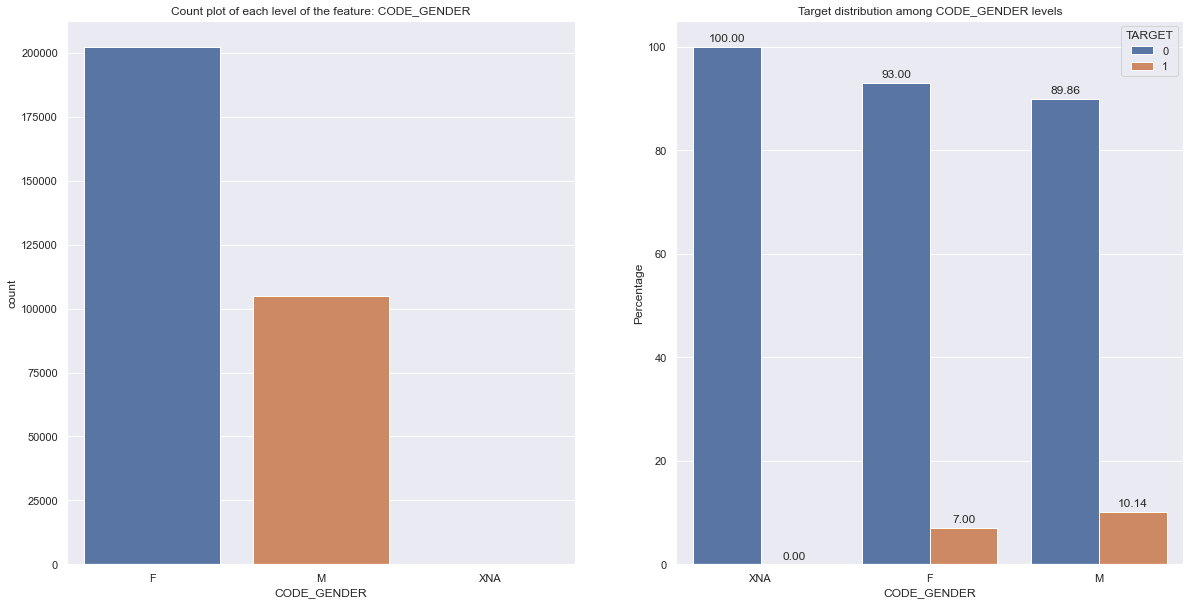

In [125]:
plot_stats('CODE_GENDER')

### Contract Type Client

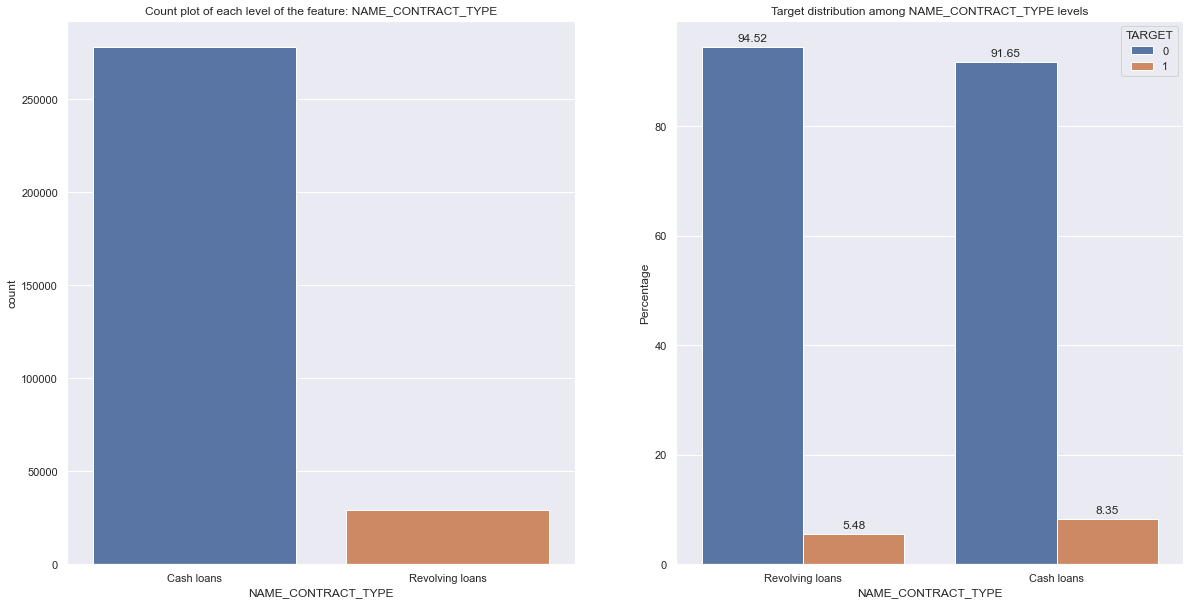

In [126]:
plot_stats('NAME_CONTRACT_TYPE')

### Flag own car and flag own real estate

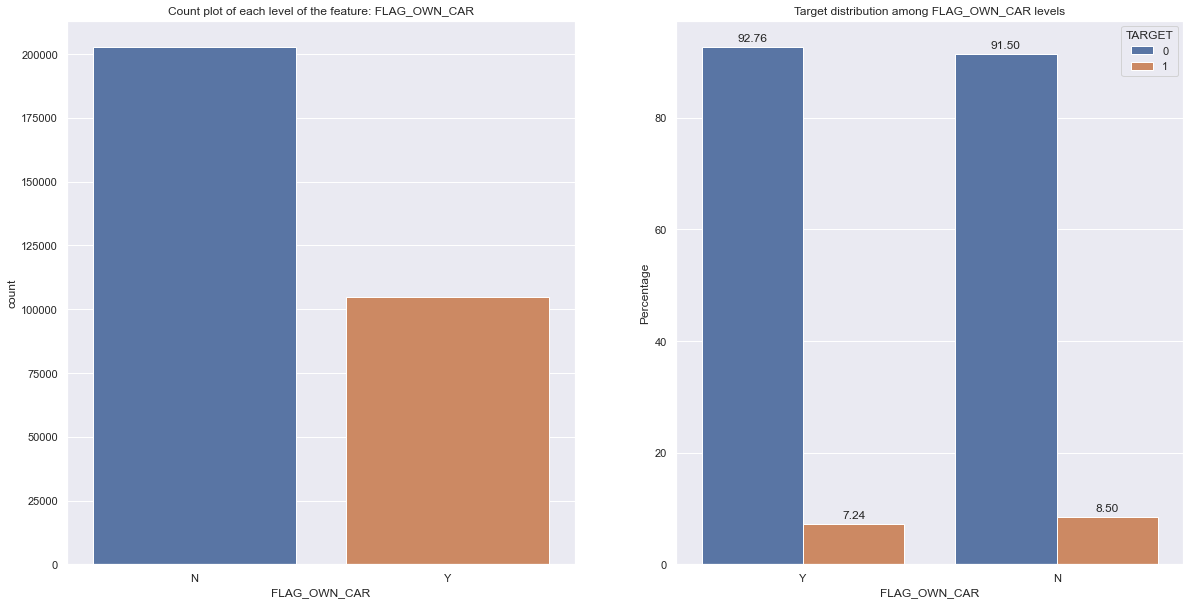

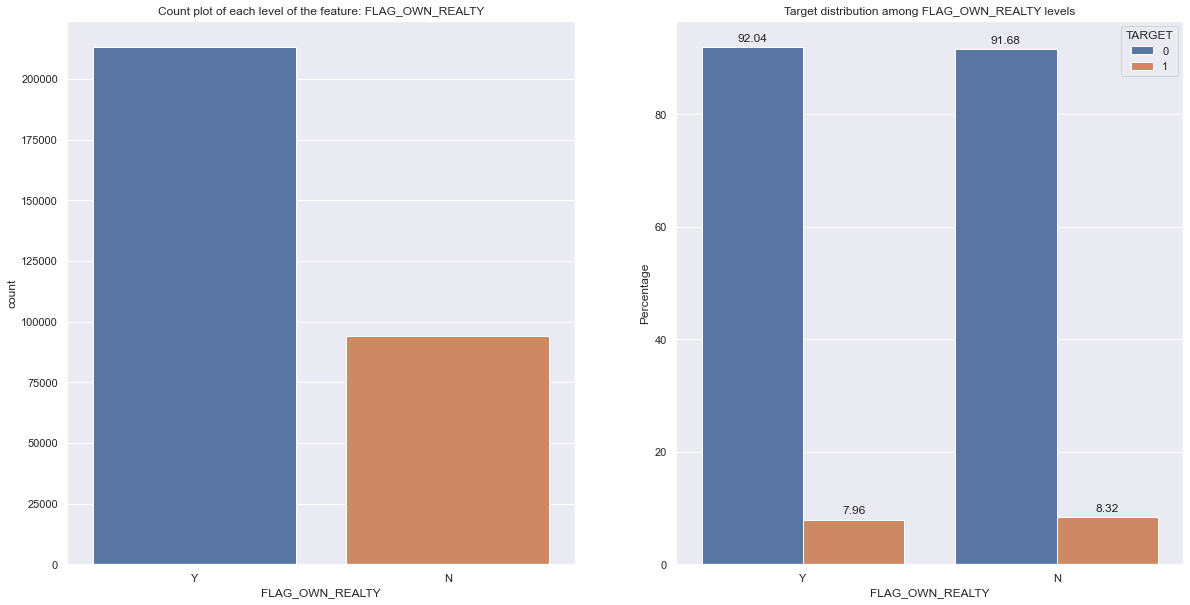

In [127]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

### Family status of client

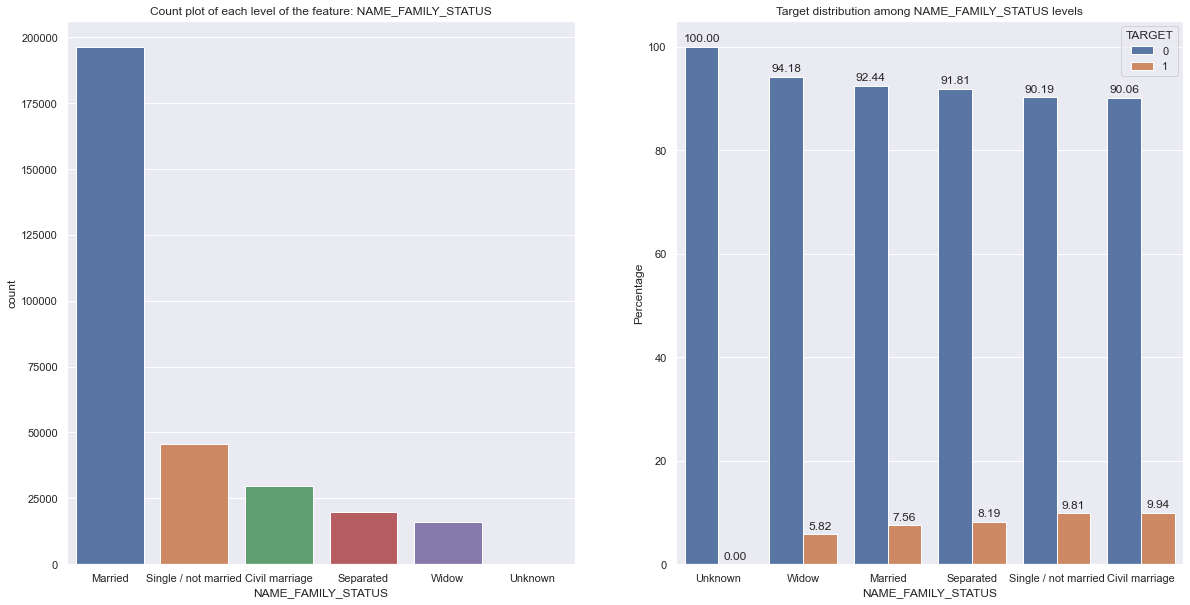

In [128]:
plot_stats('NAME_FAMILY_STATUS', True, True)

### Income type of client

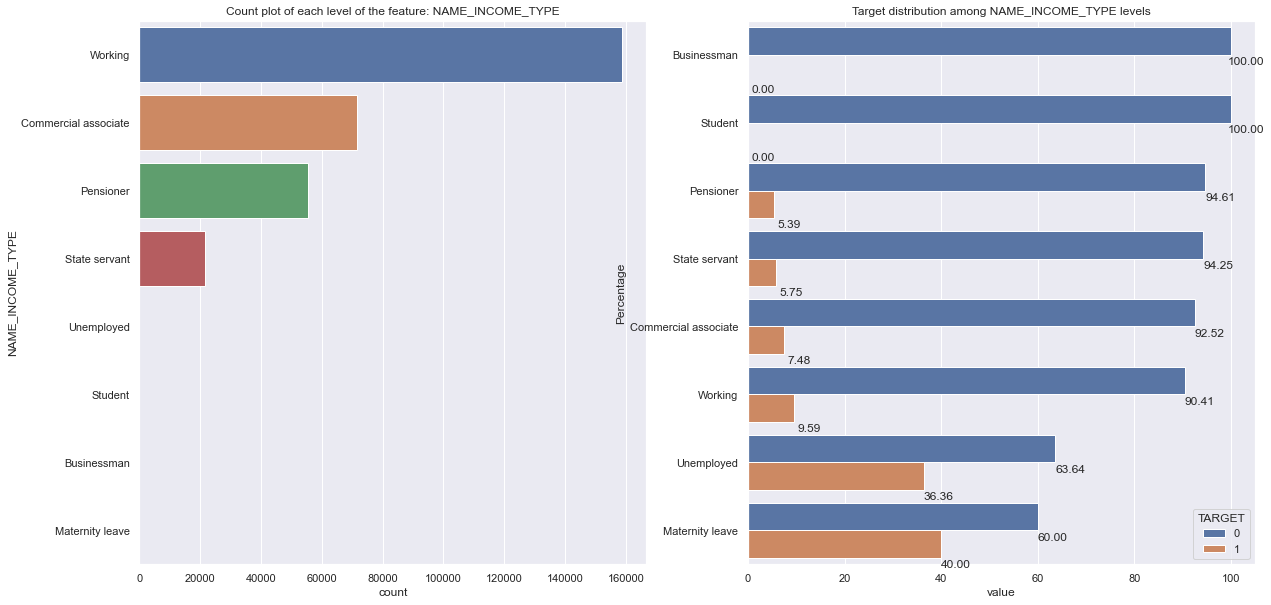

In [129]:
plot_stats('NAME_INCOME_TYPE')

### Ocupation of client

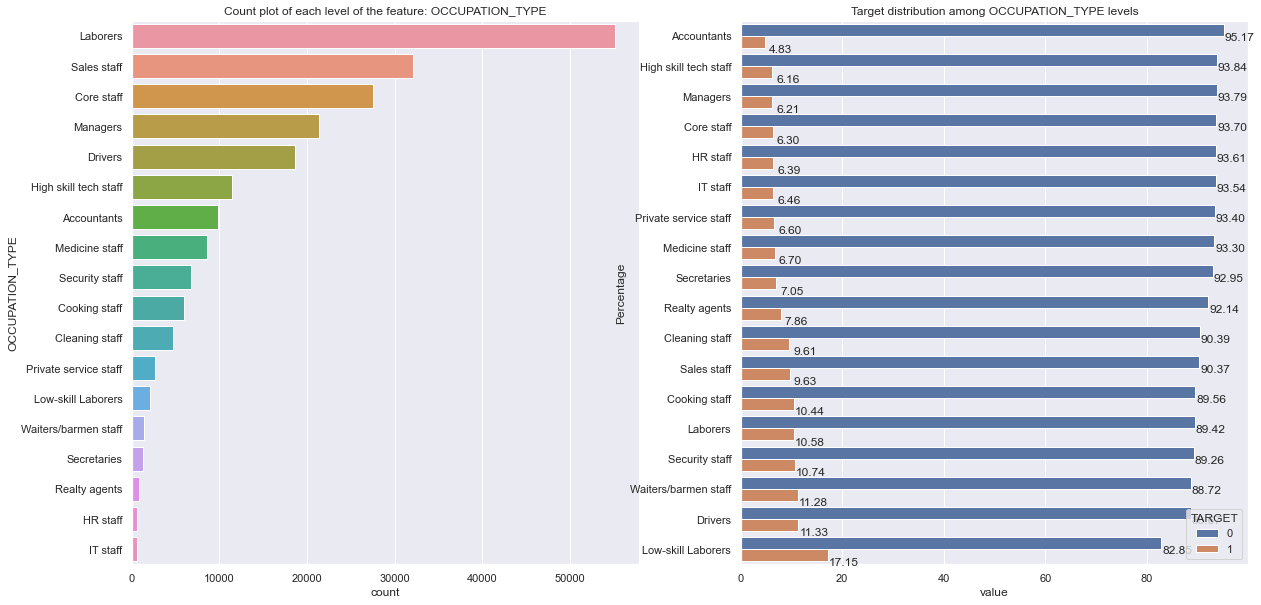

In [130]:
plot_stats('OCCUPATION_TYPE',True, False)

### Organization of Client

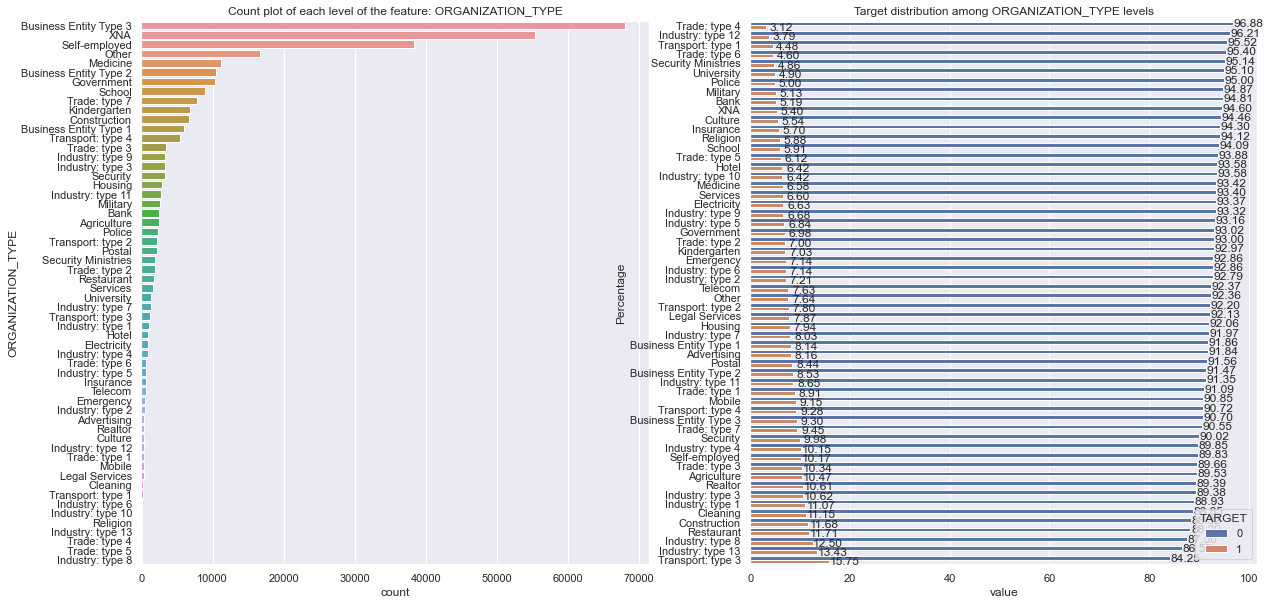

In [131]:
plot_stats('ORGANIZATION_TYPE',True, False)

### Education type of client

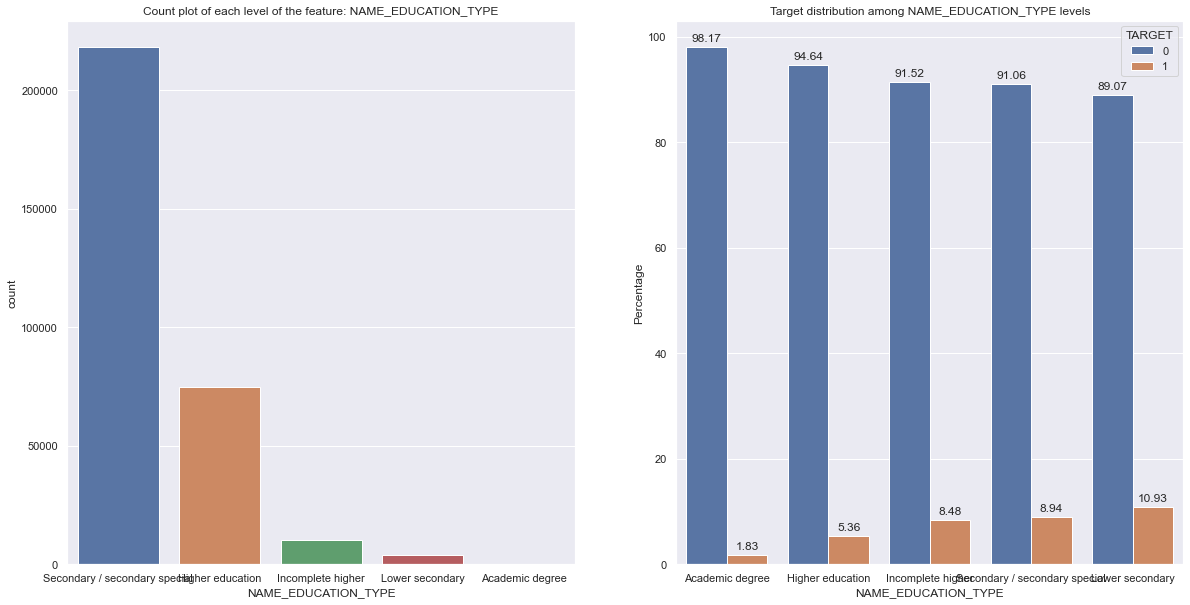

In [132]:
plot_stats('NAME_EDUCATION_TYPE',True)

### Type of the housing of client

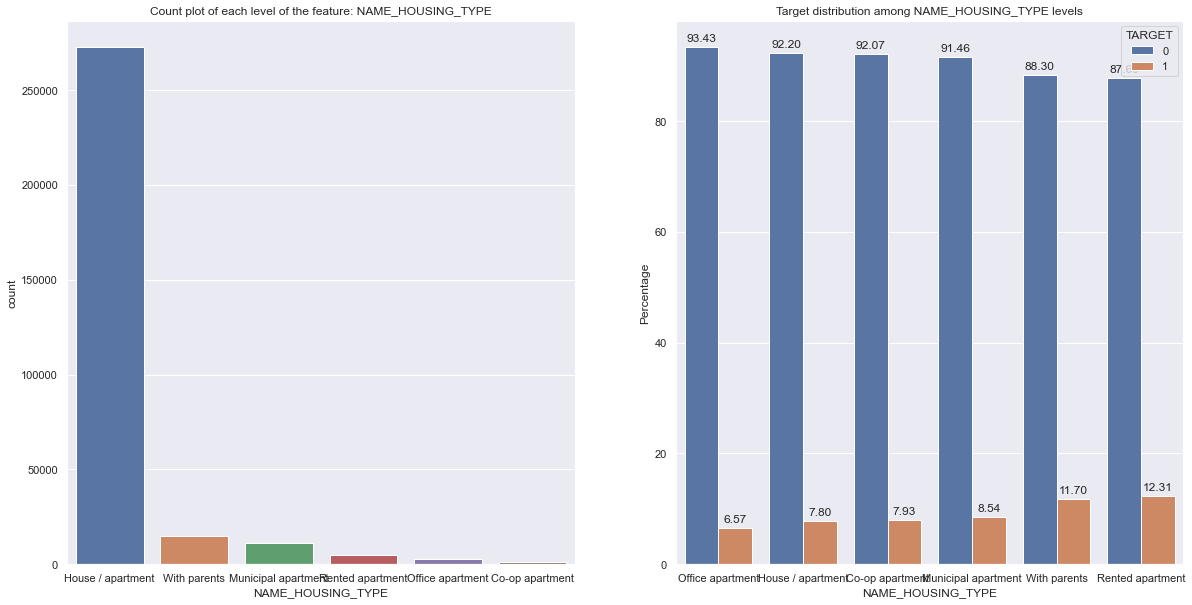

In [133]:
plot_stats('NAME_HOUSING_TYPE',True)

### Walls material of client house

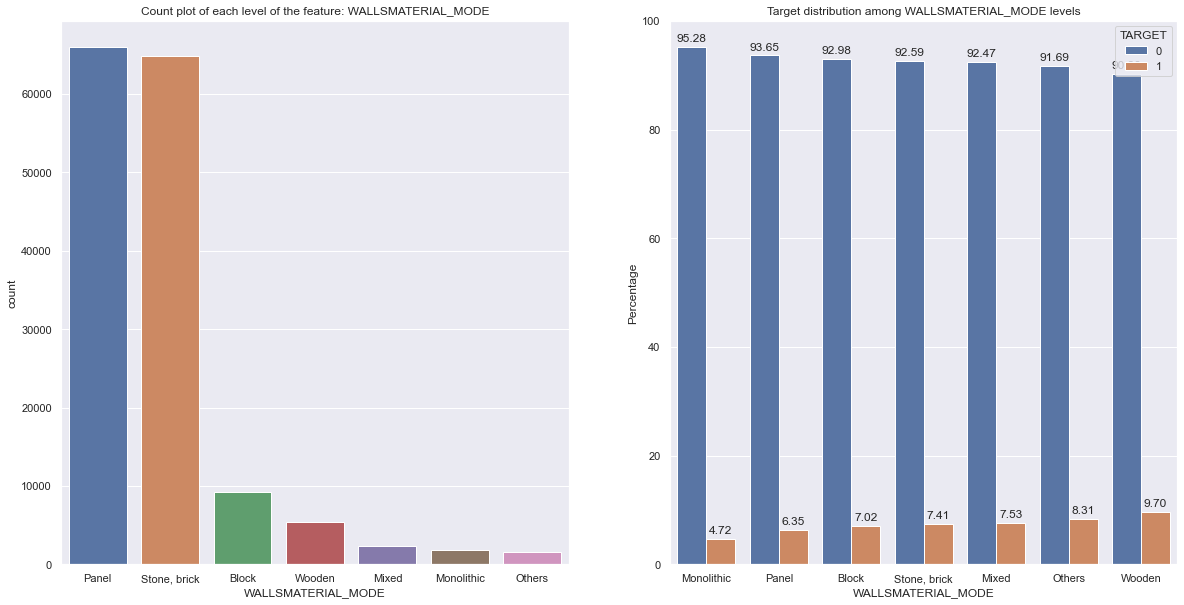

In [134]:
plot_stats('WALLSMATERIAL_MODE',True)

### Type suite when borrowing

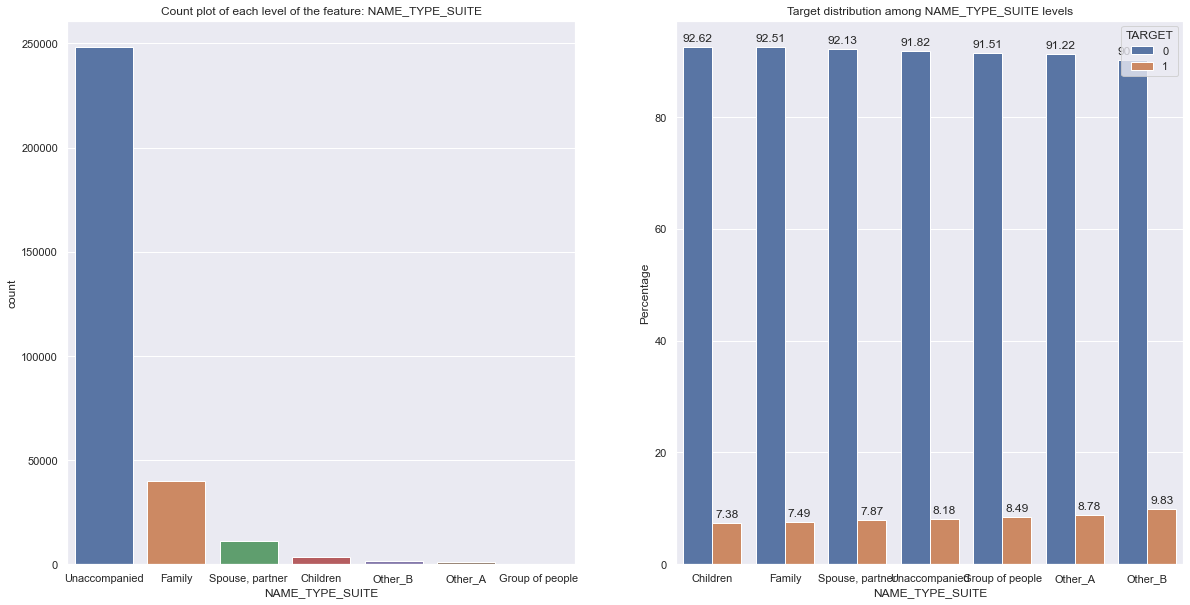

In [135]:
plot_stats('NAME_TYPE_SUITE',True)

### Number of children

In [136]:
def plot_stats_numb(feature,label_rotation=False,horizontal_layout=True):
    temp = df_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

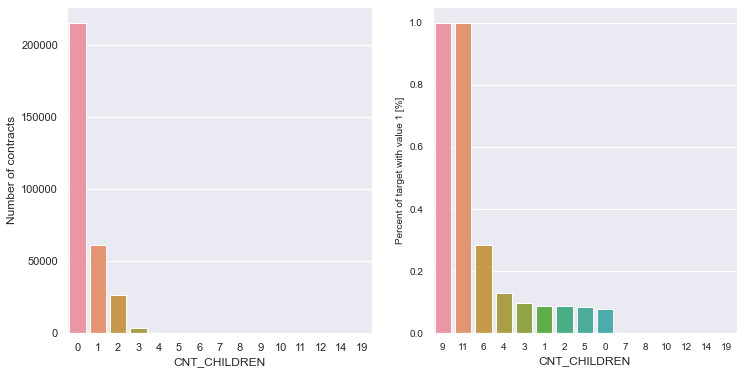

In [137]:
plot_stats_numb('CNT_CHILDREN')

### Number of family members of client

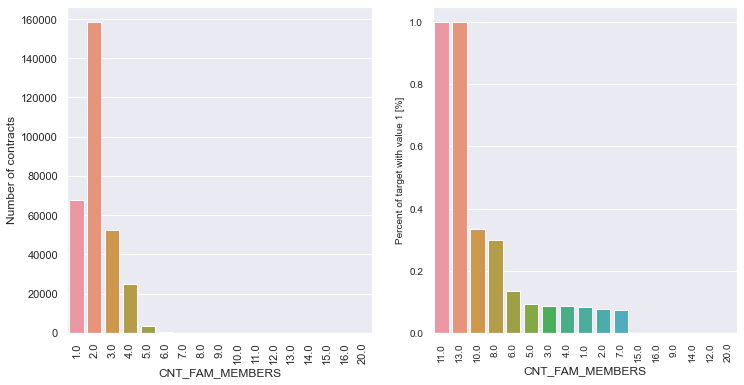

In [139]:
plot_stats_numb('CNT_FAM_MEMBERS', True)

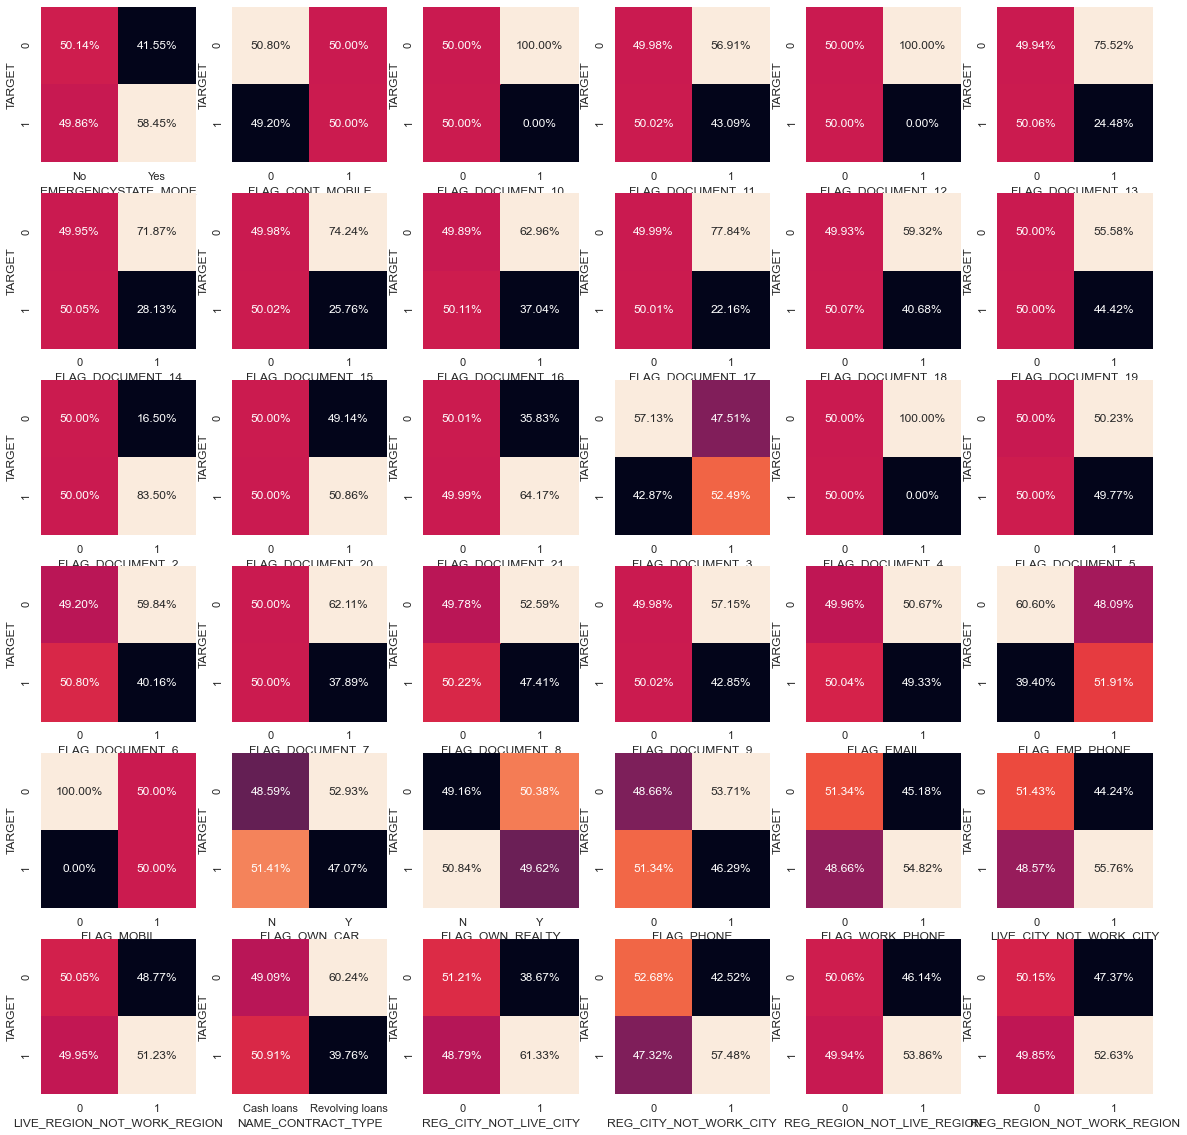

In [141]:
binary_features_lst.sort()

fig, ax = plt.subplots(6, 6, sharex = False, sharey = False, figsize = (20, 20))
i = 0
j = 0
for idx in range(len(binary_features_lst)):
    if idx % 6 == 0 and idx != 0:
        j += 1
        
    i = idx % 6
    feature = binary_features_lst[idx]
    table_df = pd.crosstab(df_train["TARGET"], df_train[feature], normalize = True)
    # Normalize statistics to remove target unbalance
    table_df = table_df.div(table_df.sum(axis = 1), axis = 0)
    table_df = table_df.div(table_df.sum(axis = 0), axis = 1)
    sns.heatmap(table_df, annot = True, square = True, ax = ax[j, i], cbar = False, fmt = '.2%')

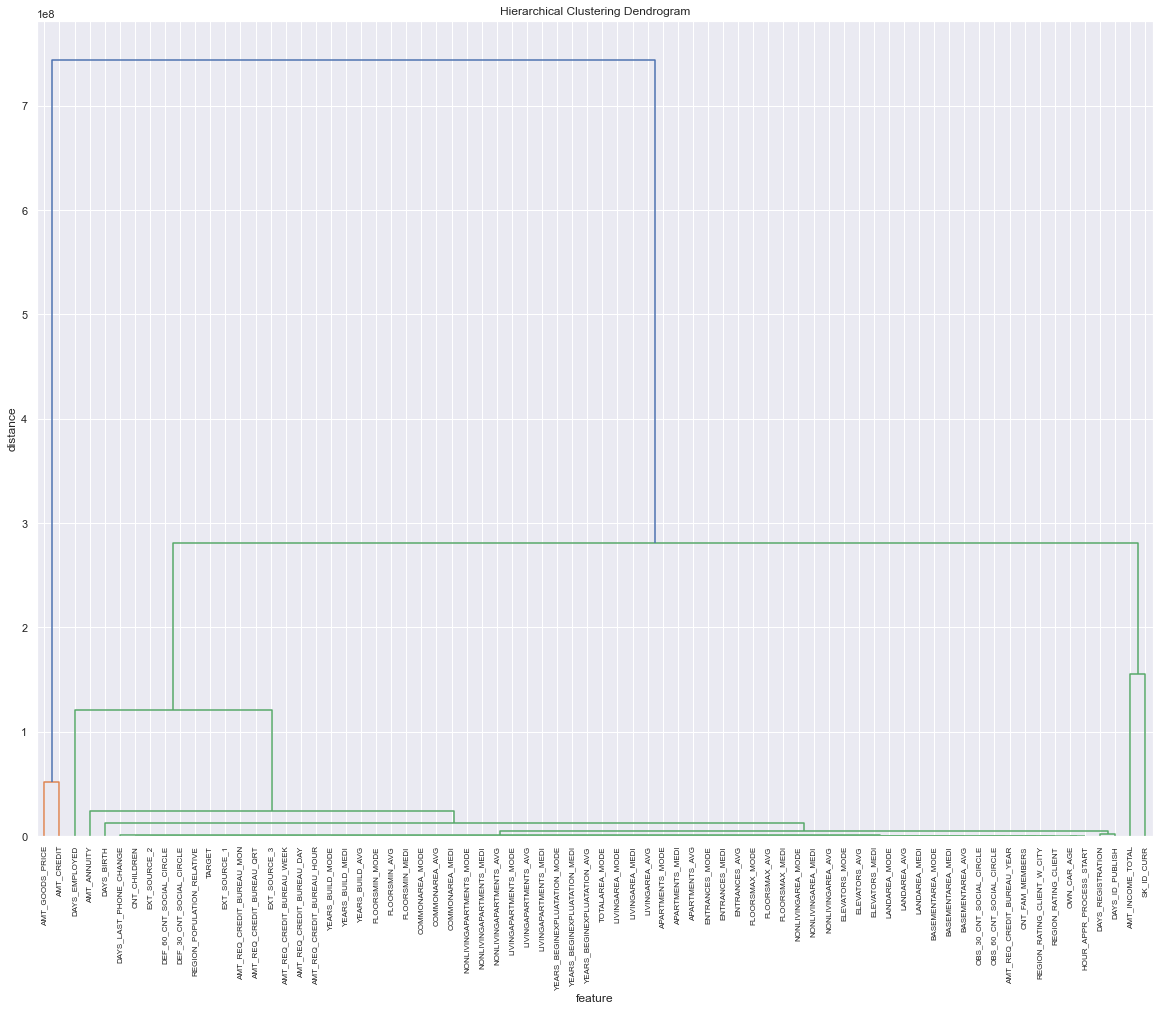

In [149]:
from scipy.cluster.hierarchy import dendrogram, linkage
# generate the linkage matrix
numerical_features_df = df_train[numerical_features_lst + ["TARGET"]]
numerical_features_df.fillna(-1, inplace = True) # We need to impute missing values before creating the dendrogram
numerical_features_df = numerical_features_df.transpose()
Z = scipy.cluster.hierarchy.linkage(numerical_features_df, "ward")
plt.figure(figsize = (20, 15))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("feature")
plt.ylabel("distance")
dend = dendrogram(
    Z,
    leaf_rotation = 90.,  # rotates the x axis labels
    leaf_font_size = 8.,  # font size for the x axis labels
    labels = numerical_features_df.index.tolist()
)

Text(0.5, 1.0, 'Correlation plot between numerical features and target')

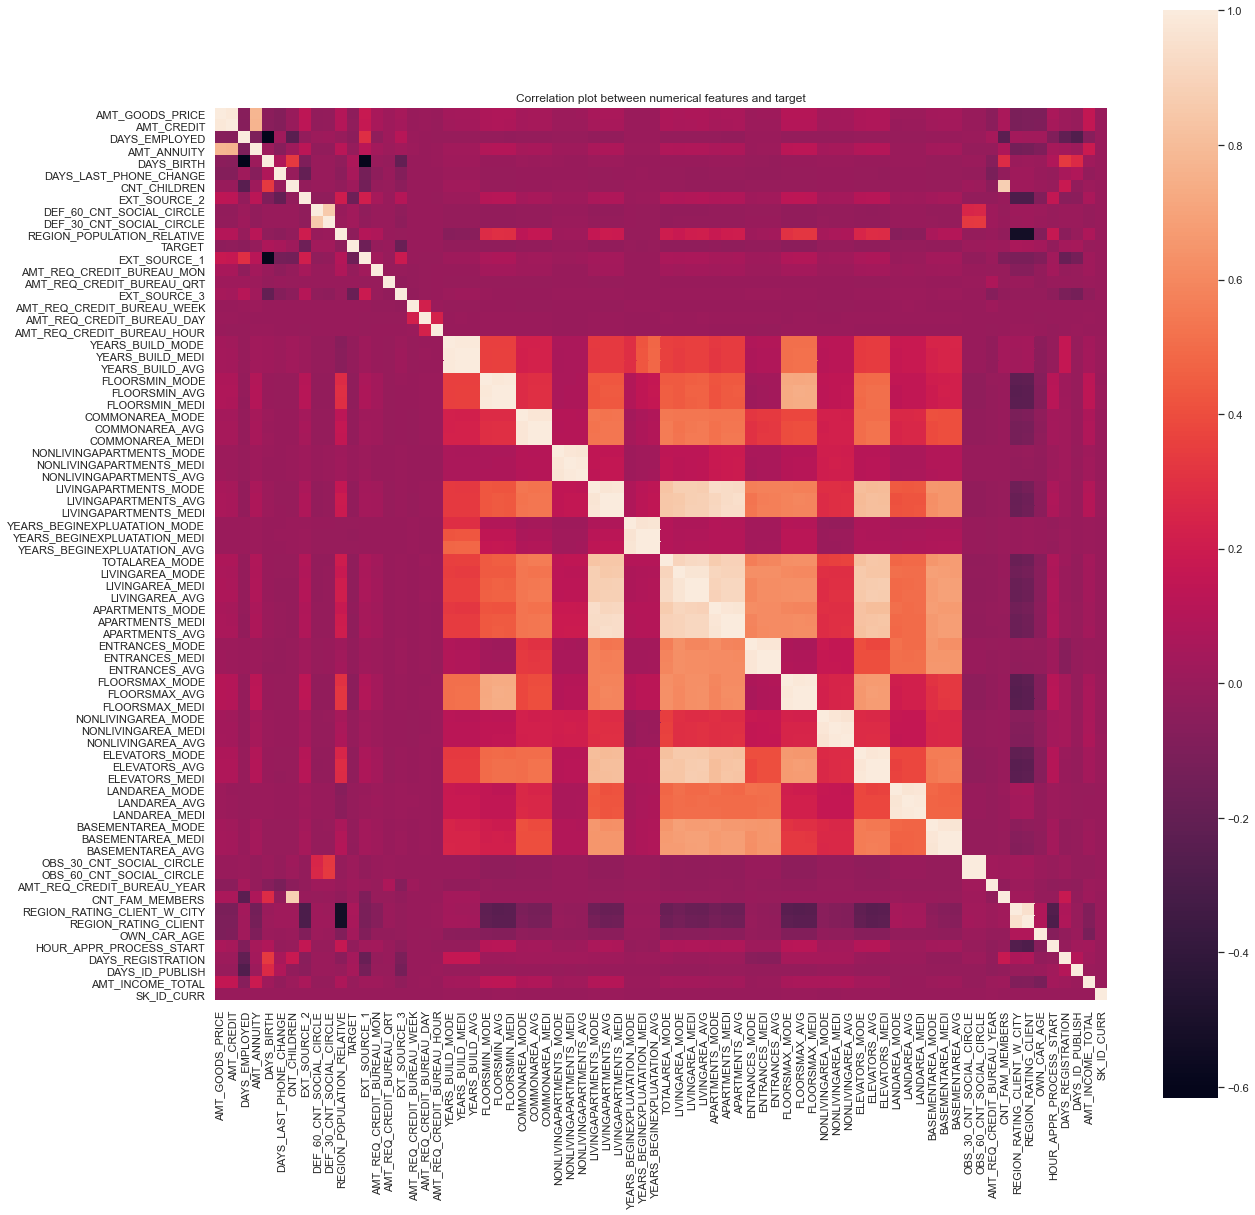

In [150]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train[dend["ivl"]].corr(), annot = False, square = True)
plt.title("Correlation plot between numerical features and target")